In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [30]:
data = pd.read_csv('data/data_train_v1_churn_rate.csv').drop('Unnamed: 0', axis = 1)
data.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,0,2,3,0,1,1,2,17,300.63,53005.25,17.0,781.750000,1,1,0,0,4,2
1,32,0,0,4,0,1,1,1,16,306.34,12838.38,10.0,686.882199,1,0,1,1,5,1
2,44,0,1,2,1,1,1,2,14,516.16,21027.00,22.0,500.690000,0,1,1,2,3,5
3,37,1,0,2,1,1,1,1,11,53.27,25239.56,6.0,567.660000,0,1,1,3,3,5
4,31,0,0,2,0,0,2,1,20,113.13,24483.66,16.0,663.060000,0,1,1,1,3,5


In [31]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsClassifier())
])
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [34]:
X = data.iloc[:,:18]
X

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,18,0,2,3,0,1,1,2,17,300.630000,53005.25,17.000000,781.750000,1,1,0,0,4
1,32,0,0,4,0,1,1,1,16,306.340000,12838.38,10.000000,686.882199,1,0,1,1,5
2,44,0,1,2,1,1,1,2,14,516.160000,21027.00,22.000000,500.690000,0,1,1,2,3
3,37,1,0,2,1,1,1,1,11,53.270000,25239.56,6.000000,567.660000,0,1,1,3,3
4,31,0,0,2,0,0,2,1,20,113.130000,24483.66,16.000000,663.060000,0,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,0,1,0,0,0,1,2,2,-650.682759,27277.68,6.000000,639.510000,0,1,1,1,0
36988,29,0,1,0,0,2,2,2,13,-638.123421,11069.71,28.000000,527.990000,1,0,0,0,1
36989,23,0,1,0,1,1,1,2,12,154.940000,38127.56,15.976715,680.470000,0,1,1,3,3
36990,53,1,2,3,0,1,2,1,15,482.610000,2378.86,20.000000,197.264414,1,1,0,0,0


In [23]:
X = X.drop('churn_risk_score', axis =1)

In [40]:
gs_model = GridSearchCV(cv = 3,
                       param_grid={'model__n_neighbors': range(2,5)},
                       estimator = pipe)

In [41]:
gs_model.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': range(2, 5)})

In [42]:
pd.DataFrame(gs_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015965,0.000828,3.198778,0.016721,2,{'model__n_neighbors': 2},0.388046,0.375314,0.384915,0.382758,0.005417,3
1,0.015305,0.000461,3.506929,0.019939,3,{'model__n_neighbors': 3},0.404752,0.393966,0.403569,0.400762,0.004830,2
2,0.014972,0.000015,4.491489,0.086532,4,{'model__n_neighbors': 4},0.425107,0.420323,0.427170,0.424200,0.002868,1


In [43]:
data

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,0,2,3,0,1,1,2,17,300.630000,53005.25,17.000000,781.750000,1,1,0,0,4,2
1,32,0,0,4,0,1,1,1,16,306.340000,12838.38,10.000000,686.882199,1,0,1,1,5,1
2,44,0,1,2,1,1,1,2,14,516.160000,21027.00,22.000000,500.690000,0,1,1,2,3,5
3,37,1,0,2,1,1,1,1,11,53.270000,25239.56,6.000000,567.660000,0,1,1,3,3,5
4,31,0,0,2,0,0,2,1,20,113.130000,24483.66,16.000000,663.060000,0,1,1,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,0,1,0,0,0,1,2,2,-650.682759,27277.68,6.000000,639.510000,0,1,1,1,0,4
36988,29,0,1,0,0,2,2,2,13,-638.123421,11069.71,28.000000,527.990000,1,0,0,0,1,5
36989,23,0,1,0,1,1,1,2,12,154.940000,38127.56,15.976715,680.470000,0,1,1,3,3,4
36990,53,1,2,3,0,1,2,1,15,482.610000,2378.86,20.000000,197.264414,1,1,0,0,0,3


In [65]:
data_c = StandardScaler().fit_transform(data.drop('churn_risk_score', axis=1))
data_c = pd.DataFrame(data_c, columns = data.drop('churn_risk_score', axis=1).columns)

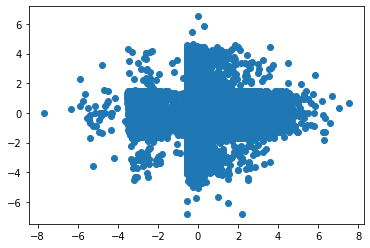

In [67]:
plt.scatter(data_c['avg_time_spent'], data_c['avg_frequency_login_days'])

In [70]:
model = KNeighborsClassifier(n_neighbors=4)
X_train, X_test, y_train, y_test = train_test_split(
    ...     X, y, test_size=0.33, random_state=42)